In [93]:
import pandas as pd
import numpy as np
import pickle
import sklearn
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


from pathlib import Path

In [94]:
# Load data
cwd = Path.cwd()
moondf = pickle.load(open(cwd / '..' / 'raw_data' / 'moonGen_scrape_2016_with_labels', 'rb'))

In [95]:
cutoff = 15
#usedf = moondf[moondf["grade"] < cutoff]
usedf = moondf.drop(["is_benchmark", "repeats"], axis=1)

X = usedf.drop(['grade'], axis=1).values
y = usedf['grade'].values
print(usedf['grade'].value_counts(), usedf.head())

4     10153
5      8453
6      4045
8      3173
7      3074
9      1061
10      389
11      181
12       51
13       29
14       24
Name: grade, dtype: int64    0_4  0_5  0_8  0_9  0_10  0_11  0_12  0_13  0_14  0_15  ...  10_7  10_8  \
0    0    0    0    0     0     0     0     0     0     0  ...     0     0   
1    0    0    0    0     0     0     0     0     1     0  ...     0     0   
2    0    0    0    0     0     0     0     0     0     0  ...     0     0   
3    0    0    0    0     0     0     0     0     0     0  ...     0     0   
4    0    0    0    0     0     0     0     0     0     0  ...     0     0   

   10_9  10_10  10_11  10_12  10_13  10_15  10_17  grade  
0     0      0      0      0      0      0      0      5  
1     0      0      0      0      0      0      1      6  
2     0      0      0      0      0      0      0      4  
3     0      0      0      0      0      0      0      5  
4     0      0      0      0      0      0      0      4  

[5 rows x 142 colu

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

clf = RandomForestClassifier(n_estimators=500, max_depth=1000, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(f"Accuracy: {sklearn.metrics.accuracy_score(y_test, y_pred)}")

Accuracy: 0.4612371470540232


Text(0.5, 1.0, 'Confusion Matrix for Random Forest Classifier')

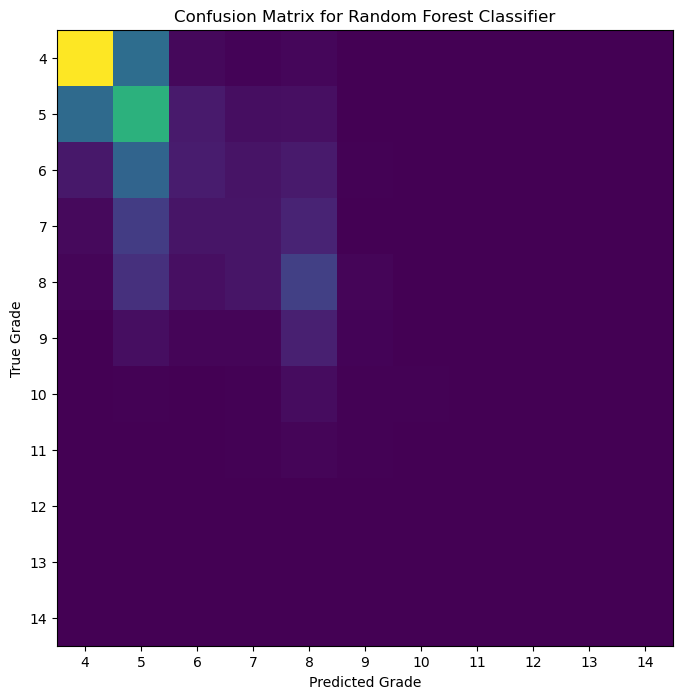

In [97]:
# print the confusion matrix
#print(pd.DataFrame(confusion_matrix(y_test, y_pred), index=clf.classes_, columns=clf.classes_))
fig = plt.figure(figsize=(8, 8))
plt.imshow(confusion_matrix(y_test, y_pred))
plt.xticks(np.arange(11), np.arange(4, 15))
plt.yticks(np.arange(11), np.arange(4, 15))
plt.xlabel('Predicted Grade')
plt.ylabel('True Grade')
plt.title('Confusion Matrix for Random Forest Classifier')

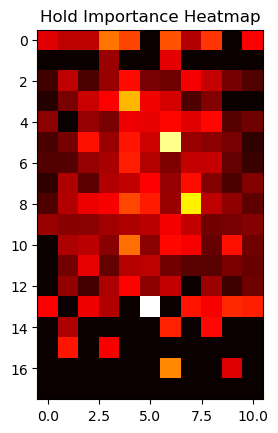

In [98]:
# Plot the feature importance
unique_holds = pickle.load(open(cwd / '..' / 'raw_data' / 'unique_holds', 'rb'))
importances = clf.feature_importances_

importance_map = np.zeros((11, 18))
for i in range(len(unique_holds)):
    hold = unique_holds[i]
    importance_map[hold[0], hold[1]] = importances[i]
    
plt.title('Hold Importance Heatmap')
plt.imshow(importance_map.T[::-1], cmap='hot', interpolation='none')

In [99]:
# make the usedf have the same amount of each grade 4-8
newdf = pd.DataFrame()
for i in range(4, 9):
    newdf = newdf.append(usedf[usedf['grade'] == i].sample(3000))


X = newdf.drop(['grade'], axis=1).values
y = newdf['grade'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

clf = RandomForestClassifier(n_estimators=500, max_depth=100, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(f"Accuracy: {sklearn.metrics.accuracy_score(y_test, y_pred)}")

print(pd.DataFrame(confusion_matrix(y_test, y_pred), index=clf.classes_, columns=clf.classes_))

/var/folders/yv/3g8ggfl9341blgk0mn8sq6_c0000gn/T/ipykernel_65094/4015531381.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newdf = newdf.append(usedf[usedf['grade'] == i].sample(3000))
/var/folders/yv/3g8ggfl9341blgk0mn8sq6_c0000gn/T/ipykernel_65094/4015531381.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newdf = newdf.append(usedf[usedf['grade'] == i].sample(3000))
/var/folders/yv/3g8ggfl9341blgk0mn8sq6_c0000gn/T/ipykernel_65094/4015531381.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newdf = newdf.append(usedf[usedf['grade'] == i].sample(3000))
/var/folders/yv/3g8ggfl9341blgk0mn8sq6_c0000gn/T/ipykernel_65094/4015531381.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pan

Accuracy: 0.41633333333333333
     4    5    6    7    8
4  373  132   35   26   14
5  158  194  118   63   58
6   41  142  175  137  142
7   16   79  116  152  246
8    8   26   87  107  355


Text(0.5, 1.0, 'Confusion Matrix for Random Forest Classifier')

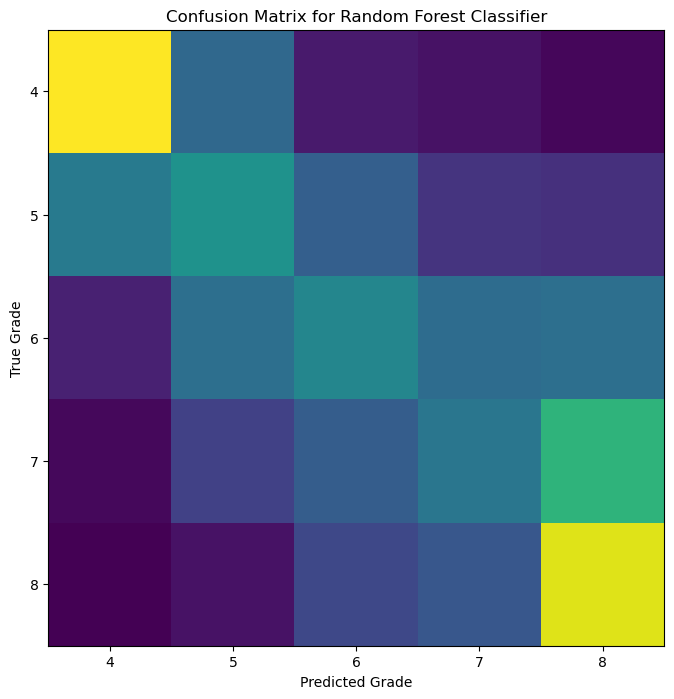

In [100]:
fig = plt.figure(figsize=(8, 8))
plt.imshow(confusion_matrix(y_test, y_pred))
plt.xticks(np.arange(5), np.arange(4, 9))
plt.yticks(np.arange(5), np.arange(4, 9))
plt.xlabel('Predicted Grade')
plt.ylabel('True Grade')
plt.title('Confusion Matrix for Random Forest Classifier')